In [2]:
import numpy as np
from skimage.measure import label, regionprops
from skimage.morphology import binary_erosion, disk
from skimage.segmentation import clear_border
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte
from scipy.ndimage import binary_fill_holes
from skimage.transform import resize

import nibabel as nib
import os
import matplotlib.pyplot as plt

In [11]:
def get_crop_coords_mri_patient_single(path_to_image: str, path_to_label: str, vol_size = [60, 80, 80]): 
    '''
    Takes the path to an MRI image and its corresponding label, and computes the coordinetes of the original 3D volume
    after cropping it to vol_size.
    This should be a direct preprocessing step in a training pipeline.
    The coordinates for the cropped volume and corresponding label are centered in the original volume.
    
    Parameters:
    path_to_image (str): The path to the MRI image.
    path_to_label (str): The path to the corresponding label. Binary mask.
    vol_size (list): The size of the cropped volume. Default is [60, 80, 80].

    returns:
    coords (list): The coordinates of the cropped volume in the original volume.
    
    '''
    # Load the image and label
    img = nib.load(path_to_image)
    label = nib.load(path_to_label)

    # Get the data
    img_data = img.get_fdata()
    label_data = label.get_fdata()

    # From the centre of the entire volume, crop the volume to vol_size
    x, y, z = img_data.shape
    xx, yy, zz = label_data.shape

    # Check if the image and label have the same size
    if x != xx or y != yy or z != zz:
        raise ValueError('The image and label do not have the same size.')

    x_start = int(x/2 - vol_size[0]/2)
    x_end = int(x/2 + vol_size[0]/2)
    y_start = int(y/2 - vol_size[1]/2)
    y_end = int(y/2 + vol_size[1]/2)
    z_start = int(z/2 - vol_size[2]/2)
    z_end = int(z/2 + vol_size[2]/2)

    # return the coordinates of the cropped volume in the original volume
    coords = [x_start, x_end, y_start, y_end, z_start, z_end]

    return coords

    



def crop_mri_patient_multiple(subject_folder: str, vol_size = [60, 80, 80]):
    '''
    Calls fun crop_mri_patient_single for all MRI images in a folder.

    For each MRI image in the folder, the function computes the coordinates of the original 3D volume
      (where the MRI image is) after cropping it to vol_size.


    Parameters:
    subject_folder (str): The path to the folder containing the MRI images.
    '''

    coords_list = []
    subjects = os.listdir(subject_folder)
    for subject in subjects:
        path_to_image = os.path.join(subject_folder, subject, 'T1.nii')
        path_to_label = os.path.join(subject_folder, subject, 'mask.nii')
        coords = get_crop_coords_mri_patient_single(path_to_image, path_to_label, vol_size = vol_size)
        coords_list.append(coords)
    
    return coords_list


def load_img_and_label_crop_and_display(subject_folder:str, vol_size= [60, 80, 80]):
    '''
    Loads the MRI image and label, crops them to vol_size and displays them.
    The function is used to check if the cropping is done correctly.

    Parameters:
    subject_folder (str): The path to the folder containing the MRI images.
    vol_size (list): The size of the cropped volume. Default is [60, 80, 80].
    '''
    coords_list = crop_mri_patient_multiple(subject_folder, vol_size)
    subjects = os.listdir(subject_folder)
    # for each subject, cut out a part and display one slice. 
    # The plot should contain a slice of each subject and its corresponding label.

    for i, subject in enumerate(subjects):
        # Load the image and label
        path_to_image = os.path.join(subject_folder, subject, 'T1.nii')
        path_to_label = os.path.join(subject_folder, subject, 'mask.nii')
        img = nib.load(path_to_image)
        label = nib.load(path_to_label)
        img_data = img.get_fdata()
        label_data = label.get_fdata()
        coords = coords_list[i]
        # Crop the image and label
        img_data = img_data[coords[0]:coords[1], coords[2]:coords[3], coords[4]:coords[5]]
        label_data = label_data[coords[0]:coords[1], coords[2]:coords[3], coords[4]:coords[5]]
        # Save the cropped image and label
        img = nib.Nifti1Image(img_data, img.affine)
        label = nib.Nifti1Image(label_data, label.affine)
        nib.save(img, os.path.join(subject_folder, subject, 'T1_cropped.nii'))
        nib.save(label, os.path.join(subject_folder, subject, 'mask_cropped.nii'))

        print(img_data[:,:,40].shape)

        # Display the image and label
        fig, ax = plt.subplots(1, 2, figsize=(6, 3))
        ax[0].imshow(img_data[:,:,40], cmap='gray')
        ax[0].set_title('MRI Image')
        ax[0].axis('off')
        ax[1].imshow(label_data[:,:,40], cmap='gray')
        ax[1].set_title('Label')
        ax[1].axis('off')
        plt.show()
        
    return

    

    

(60, 80)


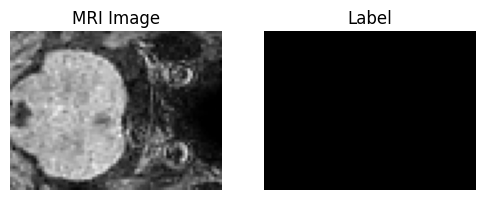

(60, 80)


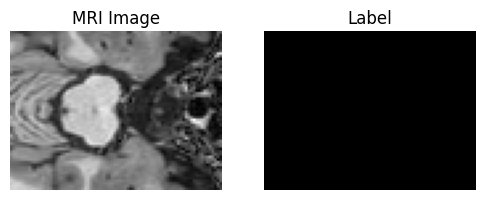

(60, 80)


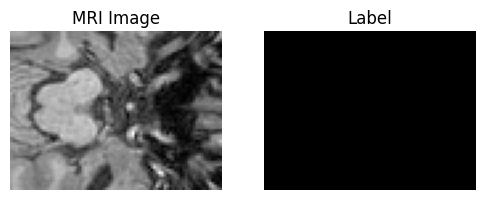

(60, 80)


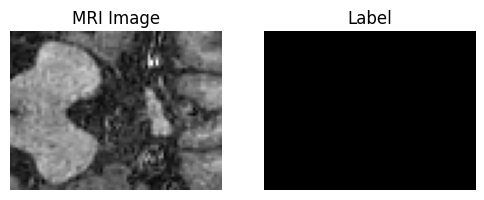

(60, 80)


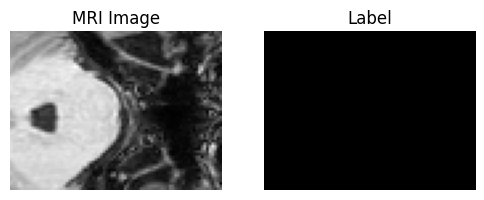

(60, 80)


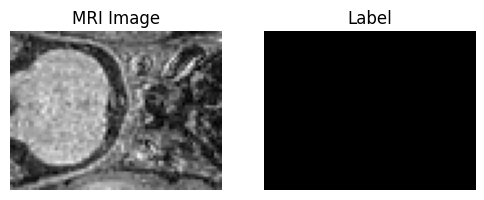

(60, 80)


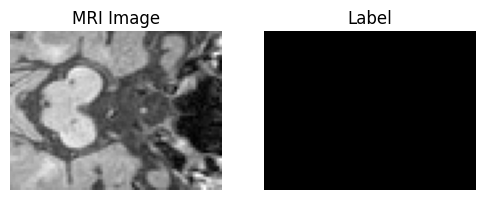

(60, 80)


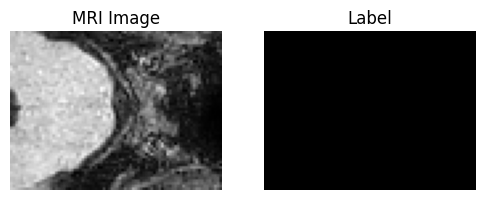

(60, 80)


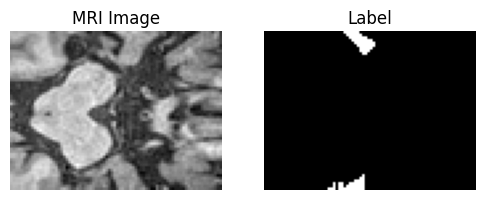

(60, 80)


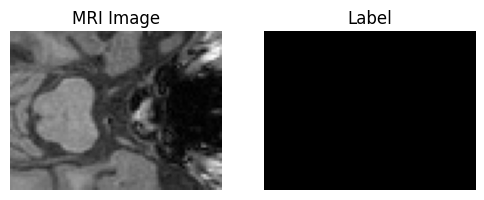

(60, 80)


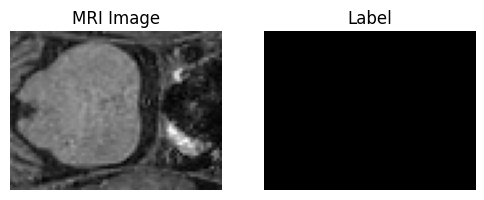

(60, 80)


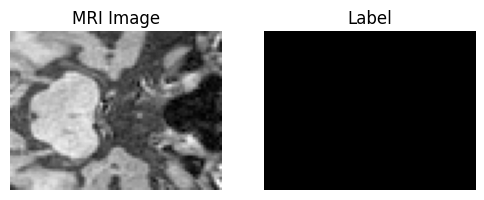

(60, 80)


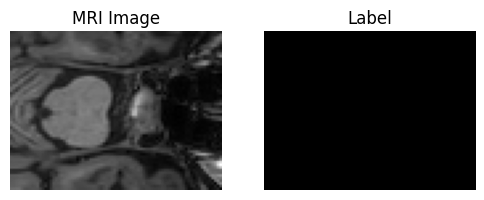

(60, 80)


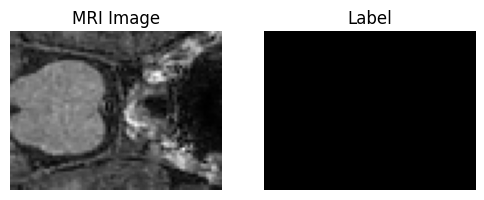

(60, 80)


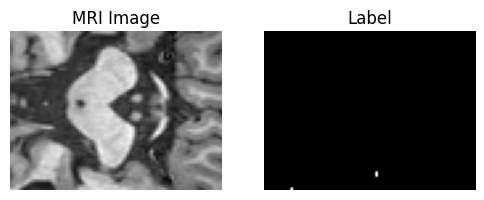

(60, 80)


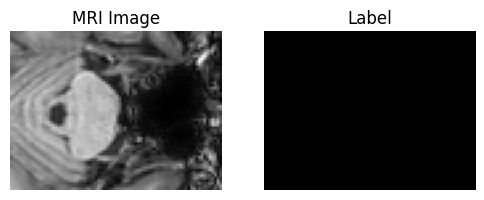

(60, 80)


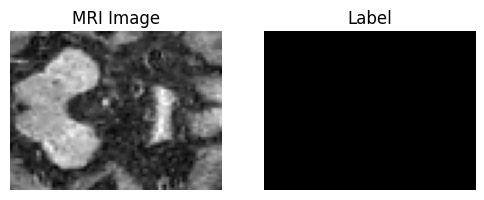

(60, 80)


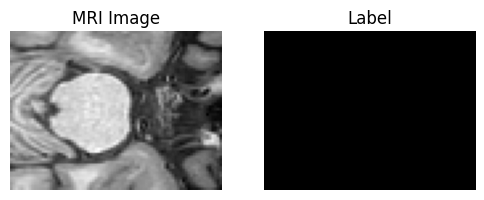

(60, 80)


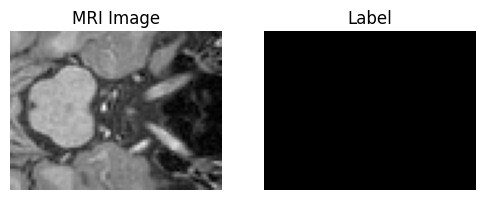

(60, 80)


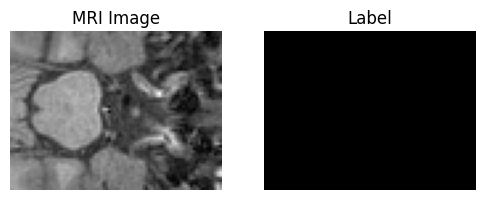

(60, 80)


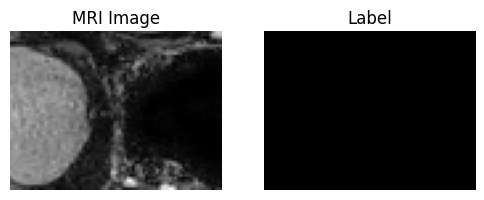

(60, 80)


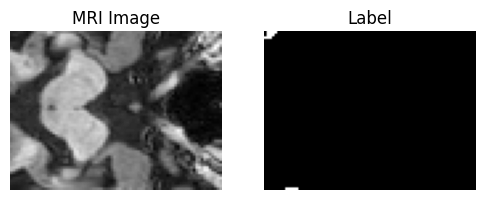

(60, 80)


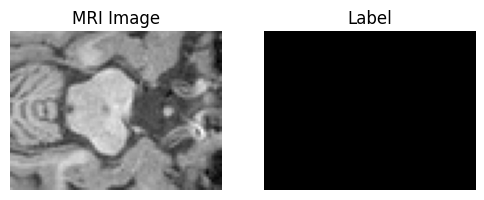

(60, 80)


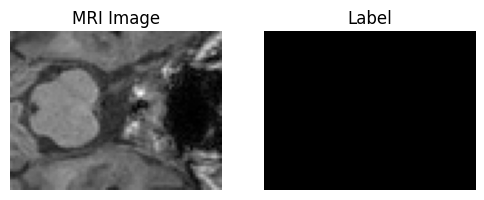

(60, 80)


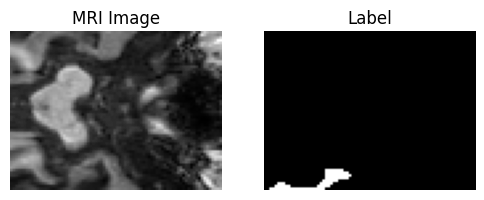

(60, 80)


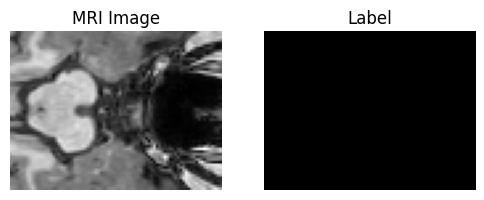

(60, 80)


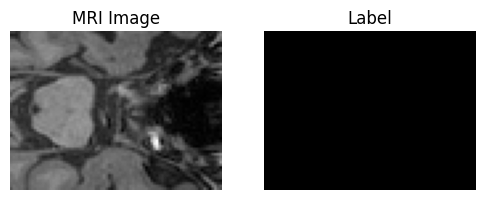

(60, 80)


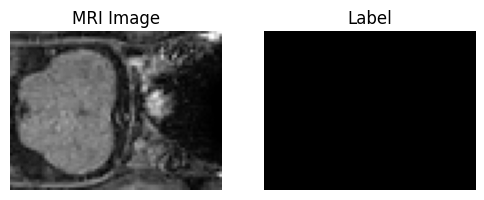

(60, 80)


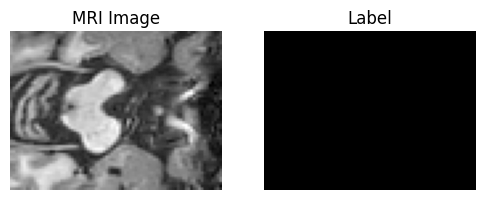

In [12]:
subject_folder="/var/data/MONAI_Choroid_Plexus/ANON_DATA_01_labels/"
load_img_and_label_crop_and_display(subject_folder)
